# 尝试做一次线性回归

In [1]:
# 1. 导入所需要的库和函数
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [2]:
# 2. 导入数据，探索数据
housevalue = fch()
x = pd.DataFrame(housevalue.data)

In [3]:
y = housevalue.target

In [4]:
x

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
[*x.columns]

[0, 1, 2, 3, 4, 5, 6, 7]

In [8]:
x.columns = housevalue.feature_names

In [9]:
[*x.columns]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
# 分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [11]:
# 恢复索引，一定要恢复索引
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [12]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
1,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
2,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
3,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
4,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09
...,...,...,...,...,...,...,...,...
6187,4.7250,44.0,5.969945,0.975410,943.0,2.576503,37.94,-122.08
6188,2.8500,38.0,5.089347,1.089347,1080.0,3.711340,32.68,-117.06
6189,3.7857,39.0,5.663507,1.052133,1246.0,2.952607,34.06,-118.14
6190,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90


In [13]:
# 先分训练集和测试集，然后再进行数据标准化
# 先用训练集训练（fit）标准化的类，然后用训练好的类分别转化(transform)训练集和测试集

In [14]:
# 建模
reg = LR(normalize=True).fit(x_train,y_train)
yhat = reg.predict(x_test)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [15]:
yhat.min()

-0.6528439725035966

In [16]:
yhat.max()

7.146198214270861

In [17]:
# 查看系数向量
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [18]:
x_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [19]:
# 查看特征对应的系数，大小可以表明对标签的影响大小
[*zip(x_train.columns,reg.coef_)]

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294494032),
 ('AveRooms', -0.10780721617317679),
 ('AveBedrms', 0.6264338275363788),
 ('Population', 5.216125353264395e-07),
 ('AveOccup', -0.0033485096463335795),
 ('Latitude', -0.4130959378947717),
 ('Longitude', -0.42621095362084777)]

## 在线性回归中，损失函数式残差平方和，但是在衡量模型的评估指标的时候，我们如果仍然使用RSS 这个指标，因为这个指标的取值没有上限，也就是说，样本数量越大残差平方和的值也越大。虽然RSS越接近于0越好，但是这种情况下并不好衡量，因此我们使用均方误差MSE

### 在sklearn中有两种方式可以得到MSE，其中一种方式是使用metrics中的mean_squared_error这个包
### 另外一种是使用交叉验证类中的scoring参数来设置均方误差

In [20]:

from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,y_test)

0.5309012639324573

In [21]:
# 可以看出误差相对来说还是比较大的 
y_test.mean()

2.0819292877906976

In [22]:
# 使用交叉验证的方式,注意在交叉验证中
cross_val_score(reg,x,y,cv=10,scoring='neg_mean_squared_error').mean()

-0.5509524296956596

In [23]:
# 使用下面的命令可以看到sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [24]:
# 调用r平方
from sklearn.metrics import r2_score
r2_score(yhat,y_test)

0.33806537615559973

In [25]:
r2 = reg.score(x_test,y_test)

In [26]:
r2

0.6043668160178814

In [27]:
# 从上面的结果中我们可以看出，同样的评估指标
# 用不同的方法调用（metrics和score）有不同的结果 
# 这里和分类的情况不同，对于score这个接口
# 需要通过shift+tab键来检查需要输入的参数和对应的位置
r2_score(y_test,yhat)

0.6043668160178814

In [28]:
# 可以看到现在值就相同了
# 或者可以直接指定参数，就不会有顺序的问题了
r2_score(y_true=y_test,y_pred=yhat)

0.6043668160178814

In [29]:
# 交叉验证中的r平方值
cross_val_score(reg,x,y,cv=10,scoring='r2').mean()

0.5110068610524555

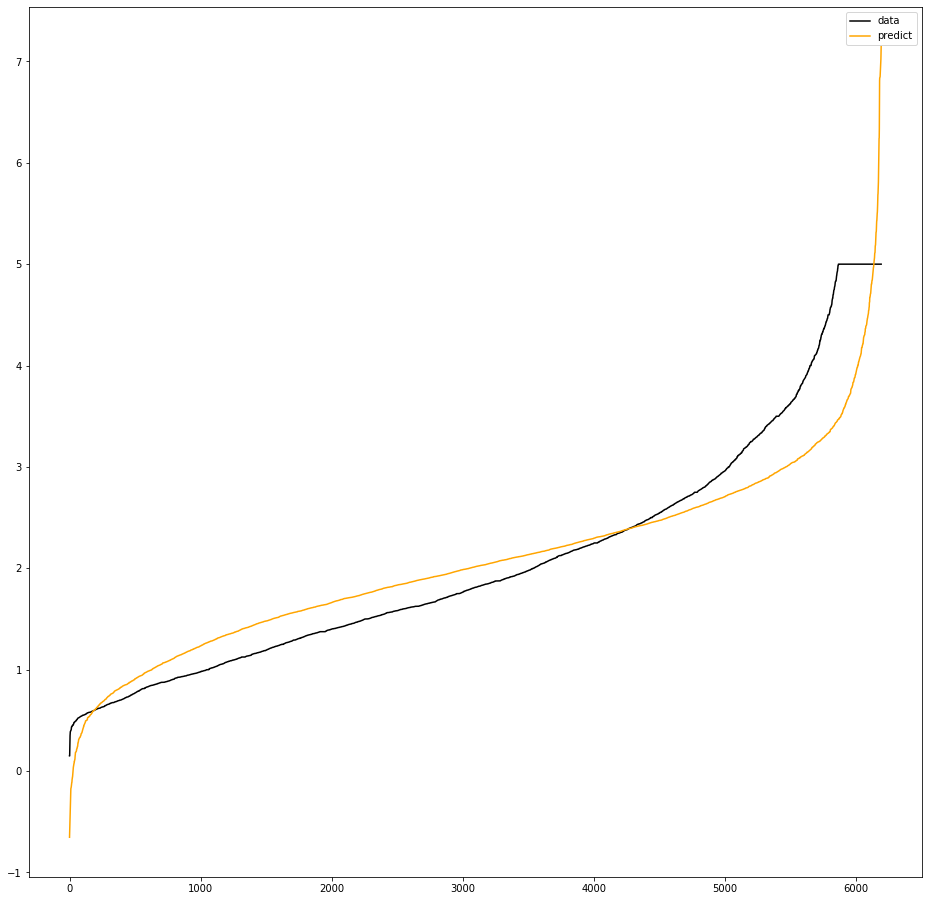

In [30]:
# 根据数据结果，mse并不大，但是r平方的值很小，这种情况是
# 一部分数据模拟正确，但是数据的分布并没有拟合的非常好
# 可以绘制曲线来看一看是什么情况
import matplotlib.pyplot as plt
# 在绘图的时候会对原本的y_test和yhat都进行排序，否则会非常乱
plt.figure(figsize=[16,16])
plt.plot(range(len(y_test)),sorted(y_test),c='black',label='data')
plt.plot(range(len(yhat)),sorted(yhat),c='orange',label='predict')
plt.legend()
plt.show()

In [31]:
type(y_test)

numpy.ndarray

In [32]:
y_test

array([0.967, 0.616, 2.298, ..., 2.457, 1.875, 0.683])

In [33]:
# 使用numpy创建一组数据
import numpy as np
rng = np.random.RandomState(42)

In [34]:
x = rng.randn(100,80)
y = rng.randn(100)
cross_val_score(LR(),x,y,cv=5,scoring='r2')

array([-180.3101809 ,   -5.64216644,  -15.16746093,  -78.50015591,
        -66.04337804])

In [35]:
# 为什么会有负的r平方呢
# 可以用数学的方式去证明，这种情况就是我们的模型非常糟糕

# 岭回归
## 岭回归产生的原因
在线性回归中，如果存在多重共线性（精确相关关系或高度相关关系）那么这种情况下，特征矩阵求解就会出现除0
错误。而岭回归就是为了要解决这个问题。解决的方法是增加一个正则项。这个正则项的表达式是系数矩阵的L2范式乘以一个正则项系数$\alpha$

In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [37]:
housevalue = fch()

In [38]:
x = pd.DataFrame(housevalue.data)

In [39]:
y = housevalue.target

In [40]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [41]:
x.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
# 分割训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [43]:
# 数据集恢复索引，养成良好习惯
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [44]:
# 使用岭回归进行建模
reg = Ridge(alpha=1).fit(x_train,y_train)

In [45]:
reg.score(x_test,y_test)# 岭回归建模的结果和线性回归几乎相同，因此数据应该不是多重共线性的问题

0.6043610352312276

In [46]:
# 下面对比交叉验证下，岭回归和线性回归结果的变化
# alpha 从1 到1001
alpharange = np.arange(1,1001,100)

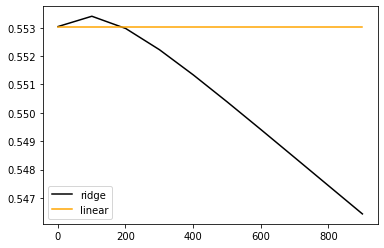

In [47]:
from sklearn.model_selection import cross_val_score
ridge,lr = [],[]
def draw_learn_line(ridge,lr,alpharange):
    for alpha in alpharange:
        # 岭回归模型
        reg = Ridge(alpha=alpha)
        # 线性回归模型
        linear = LinearRegression()
        regs = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
        linears = cross_val_score(linear,x,y,cv=5,scoring='r2').mean()
        ridge.append(regs)
        lr.append(linears)
    # 绘图
    # plt.figure(figsize=[10,10])
    plt.plot(alpharange,ridge,c='black',label='ridge')
    plt.plot(alpharange,lr,c='orange',label='linear')
    plt.legend()
    plt.show()
draw_learn_line(ridge,lr,alpharange)

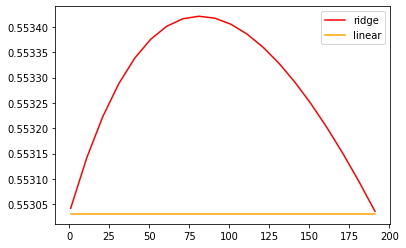

In [48]:
# 根据图像可以知道我们的数据集的多重共线性并不明显
# 细化学习曲线
alpharange_d = np.arange(1,201,10)
ridge_d,linear_d = [],[]
for i in alpharange_d:
    # 岭回归建模
    ridge = Ridge(alpha=i).fit(x_train,y_train)
    linear = LinearRegression().fit(x_train,y_train)
    ridge_score = cross_val_score(ridge,x,y,cv=5).mean()
    linear_score = cross_val_score(linear,x,y,cv=5).mean()
    ridge_d.append(ridge_score)
    linear_d.append(linear_score)
# 绘图
plt.plot(alpharange_d,ridge_d,c='red',label='ridge')
plt.plot(alpharange_d,linear_d,c='orange',label='linear')
plt.legend()
plt.show()

In [49]:
# 使用波士顿房价数据集观察方差变化
from sklearn.datasets import load_boston
x = load_boston().data
y = load_boston().target

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)

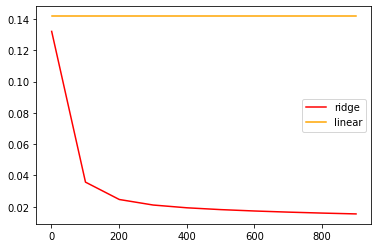

In [51]:
# 先观察方差的变化
alpharange = np.arange(1,1001,100)
ridge,lr = [],[]
for i in alpharange:
    ridge_model = Ridge(alpha=i).fit(x_train,y_train)
    linear_model = LinearRegression().fit(x_train,y_train)
    ridge_score = cross_val_score(ridge_model,x,y,cv=5).var()
    linear_score = cross_val_score(linear_model,x,y,cv=5).var()
    ridge.append(ridge_score)
    lr.append(linear_score)
plt.plot(alpharange,ridge,c='red',label='ridge')
plt.plot(alpharange,lr,c='orange',label='linear')
plt.legend()
plt.show()

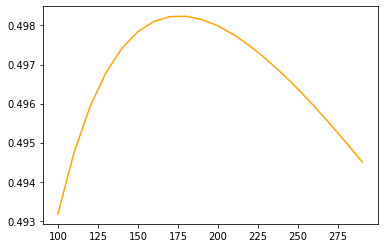

In [52]:
# 可以看到在加利福尼亚房价集中方差在alpha变化的过程中是增加的，但是在波士顿房价数组中
# 方差反而是减小的，可以得出结论是在波士顿房价的数据集中应该存在多重共线性
# 细化学习曲线
alpharange_d = np.arange(100,300,10)
ridge,lr = [],[]
for alpha in alpharange_d:
    reg = Ridge(alpha=alpha).fit(x_train,y_train)
    regs = cross_val_score(reg,x,y,cv=5).mean()
    ridge.append(regs)
plt.plot(alpharange_d,ridge,c='orange')
plt.show() 

In [53]:
# 带交叉验证的岭回归
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression,RidgeCV

# 尝试做一次线性回归

In [54]:
# 1. 导入所需要的库和函数
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [55]:
# 2. 导入数据，探索数据
housevalue = fch()
x = pd.DataFrame(housevalue.data)

In [56]:
y = housevalue.target

In [57]:
x

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [58]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [59]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [60]:
[*x.columns]

[0, 1, 2, 3, 4, 5, 6, 7]

In [61]:
x.columns = housevalue.feature_names

In [62]:
[*x.columns]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [63]:
# 分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [64]:
# 恢复索引，一定要恢复索引
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [65]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
1,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
2,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
3,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
4,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09
...,...,...,...,...,...,...,...,...
6187,4.7250,44.0,5.969945,0.975410,943.0,2.576503,37.94,-122.08
6188,2.8500,38.0,5.089347,1.089347,1080.0,3.711340,32.68,-117.06
6189,3.7857,39.0,5.663507,1.052133,1246.0,2.952607,34.06,-118.14
6190,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90


In [66]:
# 先分训练集和测试集，然后再进行数据标准化
# 先用训练集训练（fit）标准化的类，然后用训练好的类分别转化(transform)训练集和测试集

In [67]:
# 建模
reg = LR(normalize=True).fit(x_train,y_train)
yhat = reg.predict(x_test)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [68]:
yhat.min()

-0.6528439725035966

In [69]:
yhat.max()

7.146198214270861

In [70]:
# 查看系数向量
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [71]:
x_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [72]:
# 查看特征对应的系数，大小可以表明对标签的影响大小
[*zip(x_train.columns,reg.coef_)]

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294494032),
 ('AveRooms', -0.10780721617317679),
 ('AveBedrms', 0.6264338275363788),
 ('Population', 5.216125353264395e-07),
 ('AveOccup', -0.0033485096463335795),
 ('Latitude', -0.4130959378947717),
 ('Longitude', -0.42621095362084777)]

## 在线性回归中，损失函数式残差平方和，但是在衡量模型的评估指标的时候，我们如果仍然使用RSS 这个指标，因为这个指标的取值没有上限，也就是说，样本数量越大残差平方和的值也越大。虽然RSS越接近于0越好，但是这种情况下并不好衡量，因此我们使用均方误差MSE

### 在sklearn中有两种方式可以得到MSE，其中一种方式是使用metrics中的mean_squared_error这个包
### 另外一种是使用交叉验证类中的scoring参数来设置均方误差

In [73]:

from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,y_test)

0.5309012639324573

In [74]:
# 可以看出误差相对来说还是比较大的
y_test.mean()

2.0819292877906976

In [75]:
# 使用交叉验证的方式,注意在交叉验证中
cross_val_score(reg,x,y,cv=10,scoring='neg_mean_squared_error').mean()

-0.5509524296956596

In [76]:
# 使用下面的命令可以看到sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [77]:
# 调用r平方
from sklearn.metrics import r2_score
r2_score(yhat,y_test)

0.33806537615559973

In [78]:
r2 = reg.score(x_test,y_test)

In [79]:
r2

0.6043668160178814

In [80]:
# 从上面的结果中我们可以看出，同样的评估指标
# 用不同的方法调用（metrics和score）有不同的结果
# 这里和分类的情况不同，对于score这个接口
# 需要通过shift+tab键来检查需要输入的参数和对应的位置
r2_score(y_test,yhat)

0.6043668160178814

In [81]:
# 可以看到现在值就相同了
# 或者可以直接指定参数，就不会有顺序的问题了
r2_score(y_true=y_test,y_pred=yhat)

0.6043668160178814

In [82]:
# 交叉验证中的r平方值
cross_val_score(reg,x,y,cv=10,scoring='r2').mean()

0.5110068610524555

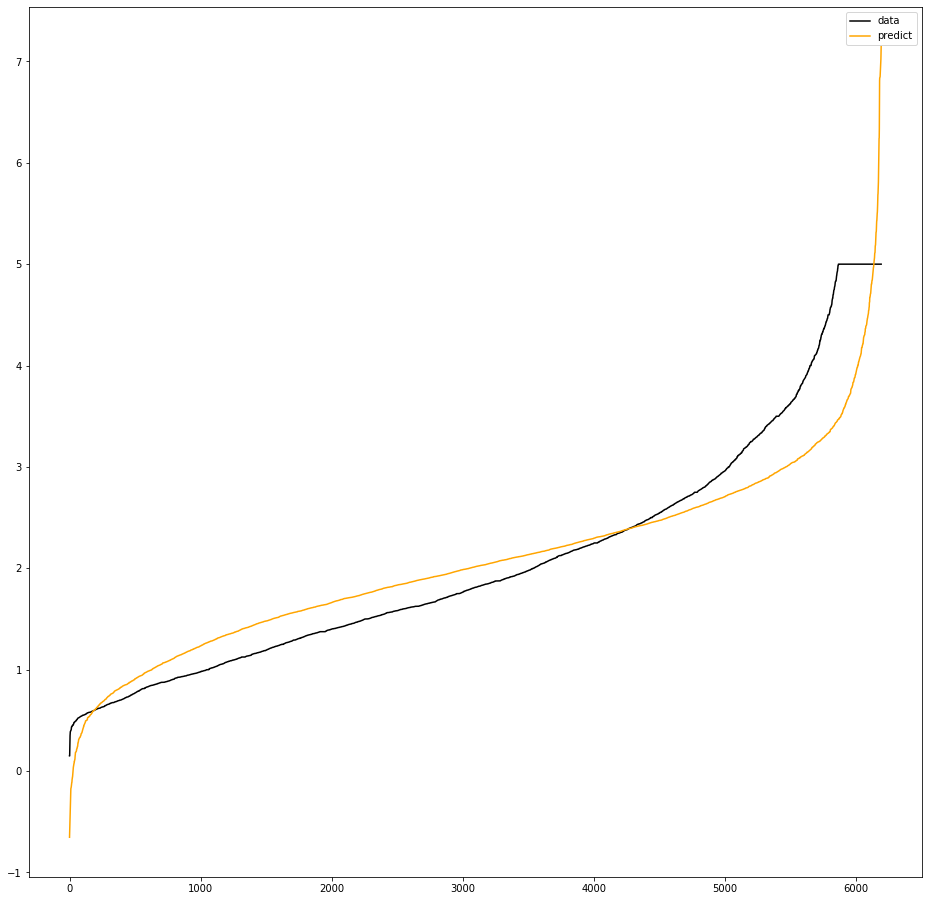

In [83]:
# 根据数据结果，mse并不大，但是r平方的值很小，这种情况是
# 一部分数据模拟正确，但是数据的分布并没有拟合的非常好
# 可以绘制曲线来看一看是什么情况
import matplotlib.pyplot as plt
# 在绘图的时候会对原本的y_test和yhat都进行排序，否则会非常乱
plt.figure(figsize=[16,16])
plt.plot(range(len(y_test)),sorted(y_test),c='black',label='data')
plt.plot(range(len(yhat)),sorted(yhat),c='orange',label='predict')
plt.legend()
plt.show()

In [84]:
type(y_test)

numpy.ndarray

In [85]:
y_test

array([0.967, 0.616, 2.298, ..., 2.457, 1.875, 0.683])

In [86]:
# 使用numpy创建一组数据
import numpy as np
rng = np.random.RandomState(42)

In [87]:
x = rng.randn(100,80)
y = rng.randn(100)
cross_val_score(LR(),x,y,cv=5,scoring='r2')

array([-180.3101809 ,   -5.64216644,  -15.16746093,  -78.50015591,
        -66.04337804])

In [88]:
# 为什么会有负的r平方呢
# 可以用数学的方式去证明，这种情况就是我们的模型非常糟糕

# 岭回归
## 岭回归产生的原因
在线性回归中，如果存在多重共线性（精确相关关系或高度相关关系）那么这种情况下，特征矩阵求解就会出现除0
错误。而岭回归就是为了要解决这个问题。解决的方法是增加一个正则项。这个正则项的表达式是系数矩阵的L2范式乘以一个正则项系数$\alpha$

In [89]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [90]:
housevalue = fch()

In [91]:
x = pd.DataFrame(housevalue.data)

In [92]:
y = housevalue.target

In [93]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [94]:
x.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [95]:
# 分割训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [96]:
# 数据集恢复索引，养成良好习惯
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [97]:
# 使用岭回归进行建模
reg = Ridge(alpha=1).fit(x_train,y_train)

In [98]:
reg.score(x_test,y_test)# 岭回归建模的结果和线性回归几乎相同，因此数据应该不是多重共线性的问题

0.6043610352312276

In [99]:
# 下面对比交叉验证下，岭回归和线性回归结果的变化
# alpha 从1 到1001
alpharange = np.arange(1,1001,100)

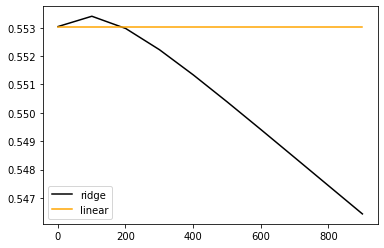

In [100]:
from sklearn.model_selection import cross_val_score
ridge,lr = [],[]
def draw_learn_line(ridge,lr,alpharange):
    for alpha in alpharange:
        # 岭回归模型
        reg = Ridge(alpha=alpha)
        # 线性回归模型
        linear = LinearRegression()
        regs = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
        linears = cross_val_score(linear,x,y,cv=5,scoring='r2').mean()
        ridge.append(regs)
        lr.append(linears)
    # 绘图
    # plt.figure(figsize=[10,10])
    plt.plot(alpharange,ridge,c='black',label='ridge')
    plt.plot(alpharange,lr,c='orange',label='linear')
    plt.legend()
    plt.show()
draw_learn_line(ridge,lr,alpharange)

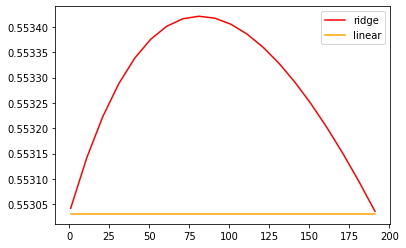

In [101]:
# 根据图像可以知道我们的数据集的多重共线性并不明显
# 细化学习曲线
alpharange_d = np.arange(1,201,10)
ridge_d,linear_d = [],[]
for i in alpharange_d:
    # 岭回归建模
    ridge = Ridge(alpha=i).fit(x_train,y_train)
    linear = LinearRegression().fit(x_train,y_train)
    ridge_score = cross_val_score(ridge,x,y,cv=5).mean()
    linear_score = cross_val_score(linear,x,y,cv=5).mean()
    ridge_d.append(ridge_score)
    linear_d.append(linear_score)
# 绘图
plt.plot(alpharange_d,ridge_d,c='red',label='ridge')
plt.plot(alpharange_d,linear_d,c='orange',label='linear')
plt.legend()
plt.show()

In [102]:
# 使用波士顿房价数据集观察方差变化
from sklearn.datasets import load_boston
x = load_boston().data
y = load_boston().target

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)

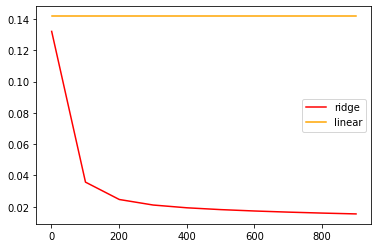

In [104]:
# 先观察方差的变化
alpharange = np.arange(1,1001,100)
ridge,lr = [],[]
for i in alpharange:
    ridge_model = Ridge(alpha=i).fit(x_train,y_train)
    linear_model = LinearRegression().fit(x_train,y_train)
    ridge_score = cross_val_score(ridge_model,x,y,cv=5).var()
    linear_score = cross_val_score(linear_model,x,y,cv=5).var()
    ridge.append(ridge_score)
    lr.append(linear_score)
plt.plot(alpharange,ridge,c='red',label='ridge')
plt.plot(alpharange,lr,c='orange',label='linear')
plt.legend()
plt.show()

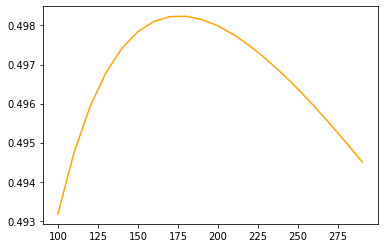

In [105]:
# 可以看到在加利福尼亚房价集中方差在alpha变化的过程中是增加的，但是在波士顿房价数组中
# 方差反而是减小的，可以得出结论是在波士顿房价的数据集中应该存在多重共线性
# 细化学习曲线
alpharange_d = np.arange(100,300,10)
ridge,lr = [],[]
for alpha in alpharange_d:
    reg = Ridge(alpha=alpha).fit(x_train,y_train)
    regs = cross_val_score(reg,x,y,cv=5).mean()
    ridge.append(regs)
plt.plot(alpharange_d,ridge,c='orange')
plt.show()

In [106]:
# 带交叉验证的岭回归,一般使用交叉验证来获得最佳参数
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression,RidgeCV
import matplotlib.pyplot as plt

In [107]:
housevalue = fch()

In [108]:
x = pd.DataFrame(housevalue.data)
y = housevalue.target

In [109]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [126]:
# cv默认是None，这种情况下使用的是++留一交叉验证++
ridge_ = RidgeCV(alphas=range(1,1001,100)
                 , scoring='neg_mean_squared_error'
                 # 下面这个参数不能和cv=n 一起用，只能用于留1交叉验证
                 , store_cv_values=True
                , cv=None).fit(x,y)

In [127]:
# 无关交叉验证的结果，始终返回r平方
ridge_.score(x,y)

0.6060251767338429

In [128]:
# 调用所有交叉验证结果
# 因为是留一交叉验证，因此每个alpha取值下都有样本个数个结果
# 二维数组一共有10列，每一列对应一个alpha值
print(ridge_.cv_values_.shape)
# 这里的值会根据选择的评估指标而变化,如果cv！=None的时候就会报错
# 因为这个时候的store_cv_values的值为False,没有保留结果
ridge_.cv_values_

(20640, 10)


array([[ 2.06279363,  2.05369381,  2.04643425, ...,  2.02291148,
         2.0194652 ,  2.01623456],
       [ 1.90803558,  1.8895648 ,  1.87489704, ...,  1.82861015,
         1.8221229 ,  1.81613948],
       [ 1.60832181,  1.62689157,  1.64067045, ...,  1.67541074,
         1.67885219,  1.68165428],
       ...,
       [-1.89752747, -1.88411446, -1.87120214, ..., -1.81288565,
        -1.80229355, -1.79201262],
       [-1.7496029 , -1.74043243, -1.73091542, ..., -1.68338796,
        -1.6742945 , -1.66538554],
       [-1.55289039, -1.54829372, -1.54213593, ..., -1.50298579,
        -1.49474151, -1.48654119]])

In [129]:
# 平均值是每个alpha取值下的平均值
ridge_.cv_values_.mean(axis=0).shape

(10,)

In [130]:
# 查看选择的最佳正则化系数,这种选择是基于留一交叉验证的
ridge_.alpha_

101